In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [48]:
# read csv
df = pd.read_csv('unfiltered_gwq.csv')
# include only state,< district, year
df = df[['state', 'district', 'year', 'chloride']]
# drop duplicates
df = df.drop_duplicates()
# drop rows with missing values
df = df.dropna()
# change indexing
df = df.reset_index(drop=True)
# save df as filtered_gwq.csv
df.to_csv('filtered_gwq.csv', index=False)

In [49]:
df = pd.read_csv('filtered_gwq.csv')
# for filtered_gwq.csv, remove data if state (telangana or andhra pradesh) and year is <= 2004
df = df[~((df['state'] == 'Telangana') & (df['year'] < 2004))]
df = df[~((df['state'] == 'Andhra Pradesh') & (df['year'] < 2004))]
# change indexing
df = df.reset_index(drop=True)
# save df as filtered_gwq.csv
df.to_csv('filtered_gwq.csv', index=False)

/tmp/ipykernel_2435/3592663474.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('state').mean()


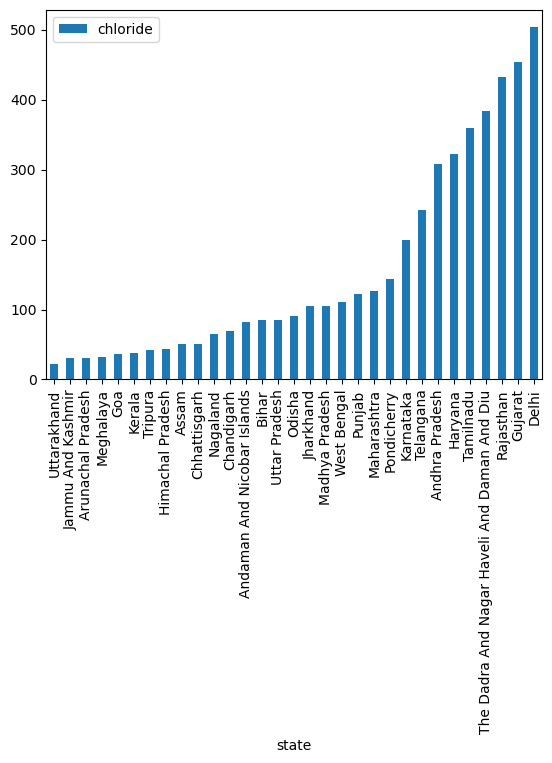

In [50]:
# read filtered_gwq.csv and draw histogram for state-wise avg chloride concentration
df = pd.read_csv('filtered_gwq.csv')
df = df.groupby('state').mean()
df = df.reset_index()
# print(df)

# sort by concentration
df = df.sort_values('chloride')
df.plot(x='state', y='chloride', kind='bar')
plt.show()

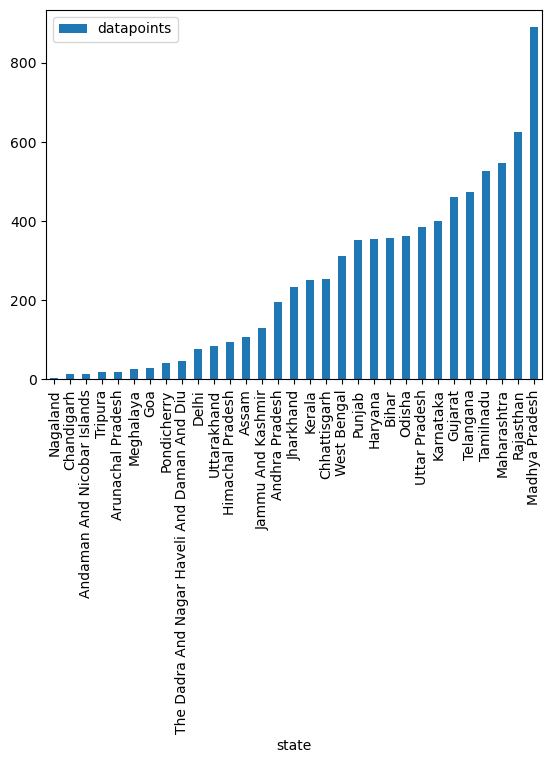

In [51]:
# print number of datapoints vs state
df = pd.read_csv('filtered_gwq.csv')
df = df.groupby('state').count()
df = df.reset_index()
df = df[['state', 'district']]
df.columns = ['state', 'datapoints']
df = df.sort_values('datapoints')
# print(df)
df.plot(x='state', y='datapoints', kind='bar')
plt.show()

                state missing expected  missing_ratio
2       Uttar Pradesh    1003     1387       0.723143
25            Tripura      57       76       0.750000
17              Assam     386      494       0.781377
27          Meghalaya     106      133       0.796992
23  Arunachal Pradesh      94      114       0.824561
26           Nagaland      16       19       0.842105


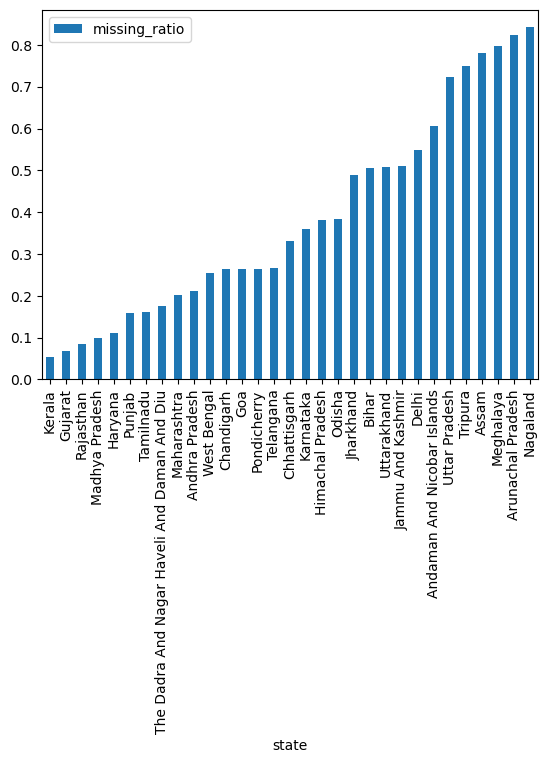

In [52]:
df = pd.read_csv('filtered_gwq.csv')
# Store names of all states
states = df['state'].unique()
# Create a new dataframe to store missing counts (integer)
incomplete_data = pd.DataFrame(columns=['state', 'missing', 'expected', 'missing_ratio'])
# Calculate missing data for each state
for state in states:
    districts = df[df['state'] == state]['district'].unique()
    available = df[df['state'] == state]
    missing_count = 19 * len(districts) - len(available)
    expected_count = 19 * len(districts)
    missing_ratio = 1 - (len(available) / expected_count)
    incomplete_data = pd.concat([incomplete_data, pd.DataFrame({'state': [state], 'missing': [missing_count], 'expected': [expected_count], 'missing_ratio': [missing_ratio]})], ignore_index=True)
incomplete_data = incomplete_data.sort_values('missing_ratio')
incomplete_data.plot(x='state', y='missing_ratio', kind='bar')
# Print states with missing ratio greater than 0.7
print(incomplete_data[incomplete_data['missing_ratio'] > 0.7])

In [53]:
df1 = pd.read_csv('unfiltered_sdp1.csv')
df2 = pd.read_csv('unfiltered_sdp2.csv')
df3 = pd.read_csv('unfiltered_sdp3.csv')
states = df1.keys()[1:]
df_sdp = pd.DataFrame(columns = df1.keys())
for state in states:
    df1_state = df1[state]
    df2_state = df2[state]
    df3_state = df3[state]
    # scaling factor 1 is df3_state's first value / df2_state's last value
    scaling_factor1 = df3_state.iloc[0] / df2_state.iloc[-1]
    # change df2_state values by scaling factor 1
    df2_state = df2_state * scaling_factor1
    # scaling factor 2 is df2_state's first value / df1_state's last value
    scaling_factor2 = df2_state.iloc[0] / df1_state.iloc[-1]
    # change df1_state values by scaling factor 2
    df1_state = df1_state * scaling_factor2
    
    # remove first and last elements of df2_state
    df2_state = df2_state[1:-1]
    df_sdp[state] = pd.concat([df1_state, df2_state, df3_state], ignore_index=True)
    print(state, scaling_factor1)
# df_sdp make years as 1999, 2000, and so on
df_sdp['YEAR'] = range(1999, 2019)
df_sdp.to_csv('filtered_sdp.csv', index=False)


ANDHRA PRADESH 1.7749355273186673
ARUNACHAL PRADESH 2.0527794501304437
ASSAM 1.9323294792506946
BIHAR 1.7641695169123153
GOA 1.6327591391382792
GUJARAT 1.5815706203285385
HARYANA 1.7104899604473798
HIMACHAL PRADESH 1.7828302164629657
JAMMU AND KASHMIR 1.92171226831421
JHARKHAND 1.713923924298564
KARNATAKA 2.237348814707305
KERALA 1.8541163835740326
MADHYA PRADESH 1.6649233490566038
CHHATTISGARH 2.0540388363531363
MAHARASHTRA 1.618894272773256
MANIPUR 1.7936681222707425
MEGHALAYA 1.749781617004756
MIZORAM 1.4538024971623156
NAGALAND 1.1359380045205036
ODISHA 1.970760798239858
PUNJAB 1.7463481936242125
RAJASTHAN 1.949854253288549
SIKKIM 2.1420404573438874
TAMILNADU 1.7450557297649725
TRIPURA 1.2078912696761668
UTTAR PRADESH 1.7656708860759494
UTTARAKHAND 1.9329642830059908
WEST BENGAL 1.6349436136985545
ANDAMAN AND NICOBAR ISLANDS 0.9921305741766249
CHANDIGARH 1.4156702065390083
DELHI 1.741071922621485
PONDICHERRY 1.4900727344210734
TELANGANA 2.0245015628697027


In [54]:
# add sdp for every data in gwq
df_gwq = pd.read_csv('filtered_gwq.csv')
df_sdp = pd.read_csv('filtered_sdp.csv')
n_samples = len(df_gwq)
# for every data in gwq, find the corresponding sdp value
for i in range(n_samples):
    state = df_gwq['state'][i]
    year = df_gwq['year'][i]
    state = state.upper()
    try:
        sdp = df_sdp[state][year - 1999]
        df_gwq.loc[i, 'sdp'] = sdp
    except:
        print(state)
        # remove data
        df_gwq = df_gwq.drop(i)
# sort by state
df_gwq.dropna()
df_gwq = df_gwq.sort_values('state')
df_gwq.to_csv('filtered_gwq_sdp.csv', index=False)

THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA 

In [55]:
# # i indexes districts, t indexes years, and ui,t is random error.
# # GWQi,t = β0 + β1SDPi,t + ui,t
# df_gwq = pd.read_csv('filtered_gwq_sdp.csv')
# y_mean = df_gwq['chloride'].mean()
# # print(y_mean)
# # calculate x_mean
# x_mean = df_gwq['sdp'].mean()
# # print(x_mean)
# # calculate sum(xi-x_mean)(yi-y_mean) / sum(xi-x_mean)^2
# beta1 = 0
# beta2 = 0
# n_samples = len(df_gwq)
# for i in range(n_samples):
#     beta1 += (df_gwq['sdp'][i] - x_mean) * (df_gwq['chloride'][i] - y_mean)
#     beta2 += (df_gwq['sdp'][i] - x_mean) ** 2
# beta1 = beta1 / beta2
# print(beta1)
# # calculate beta0
# beta0 = y_mean - beta1 * x_mean
# print(beta0)
# # summarize the results in a table and interpret
# # print(df_gwq)
# df_gwq['predicted_chloride'] = beta0 + beta1 * df_gwq['sdp']
# df_gwq['error'] = df_gwq['chloride'] - df_gwq['predicted_chloride']
# df_gwq.to_csv('filtered_gwq_sdp_predicted.csv', index=False)
# # calculate R^2
# ssr = 0
# sst = 0
# for i in range(n_samples):
#     ssr += (df_gwq['predicted_chloride'][i] - y_mean) ** 2
#     sst += (df_gwq['chloride'][i] - y_mean) ** 2
# r_squared = ssr / sst
# print(r_squared)

In [56]:
# gwq = beta0 + beta1 * sdp + ui
X = df_gwq['sdp']
X = sm.add_constant(X)
y = df_gwq['chloride']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())
r_squared = model.rsquared
print("R-squared:", r_squared)
print(model.params)
# calculate errors
predicted_values = model.predict(X)
residuals = y - predicted_values
df_gwq['predicted_chloride'] = predicted_values
df_gwq['residual'] = residuals
df_gwq.to_csv('filtered_gwq_sdp_predicted.csv', index=False)

                            OLS Regression Results                            
Dep. Variable:               chloride   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     68.09
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.82e-16
Time:                        12:30:16   Log-Likelihood:                -52452.
No. Observations:                7640   AIC:                         1.049e+05
Df Residuals:                    7638   BIC:                         1.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        166.7262      4.284     38.919      0.0

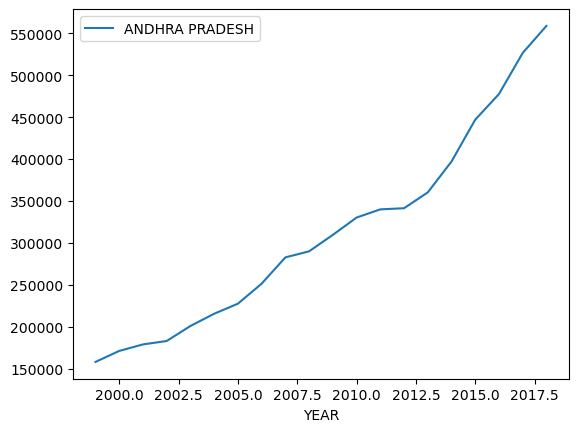

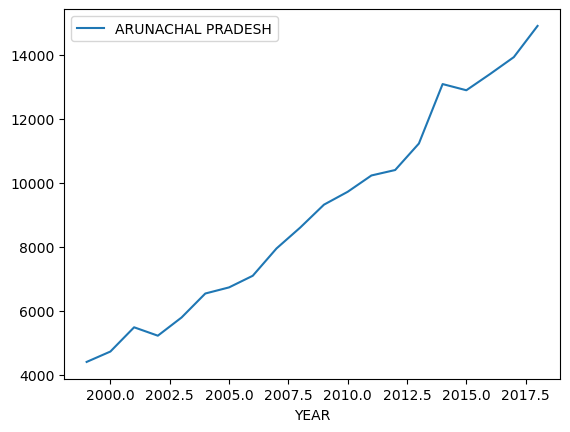

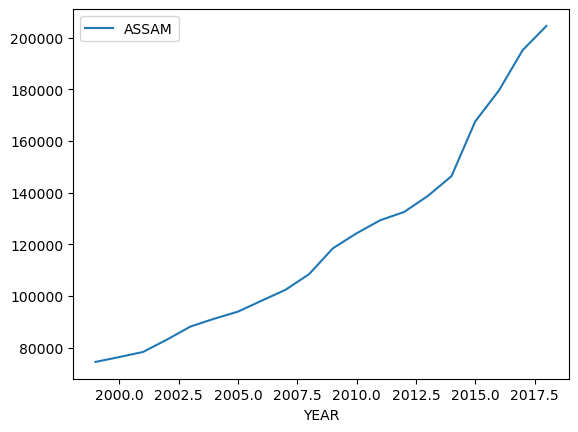

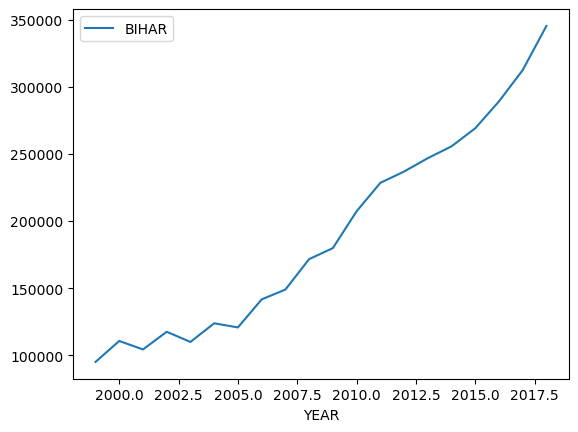

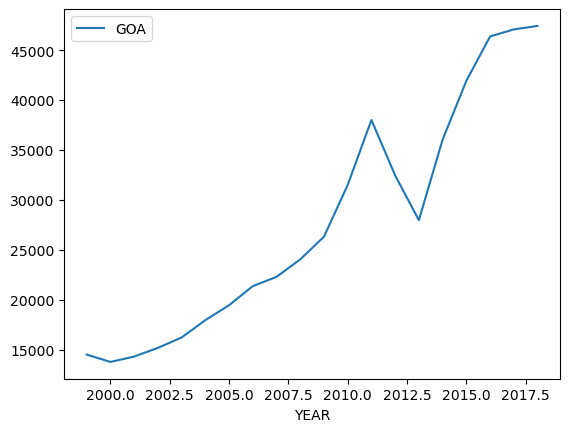

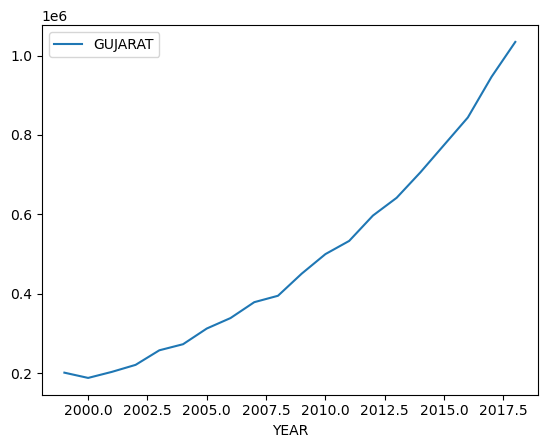

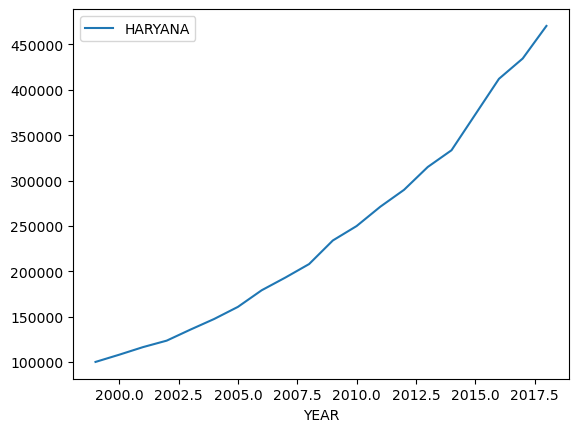

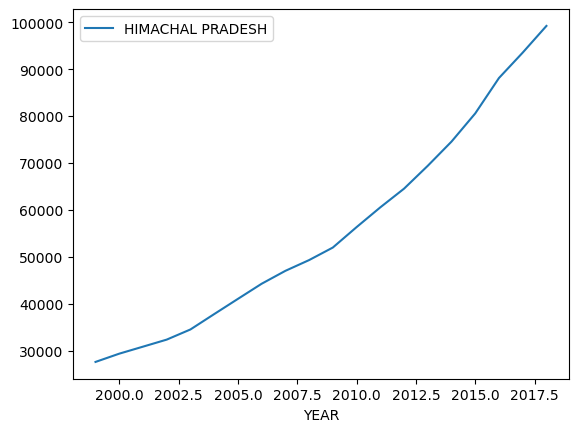

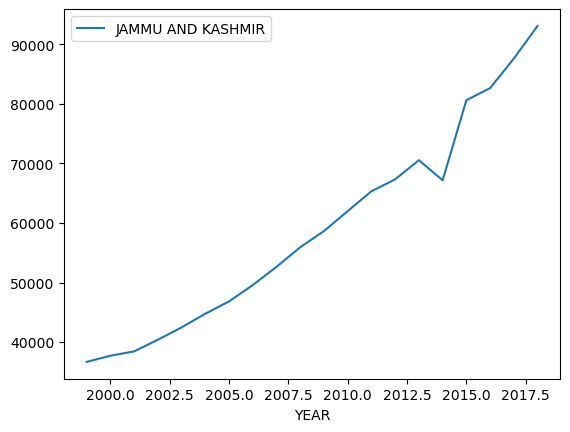

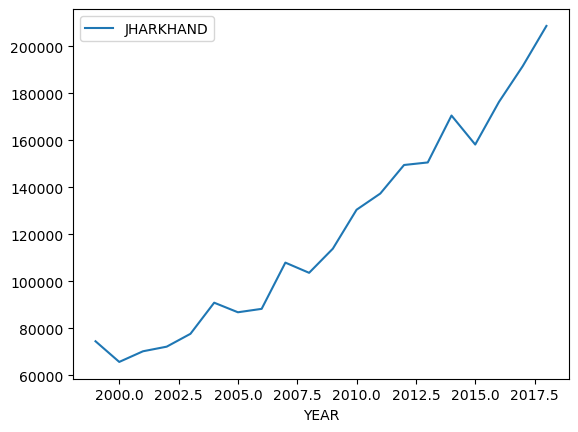

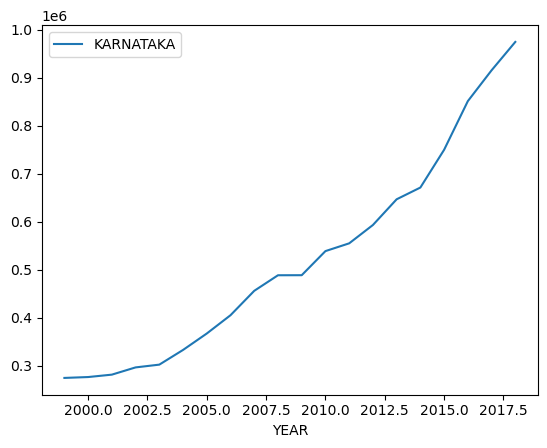

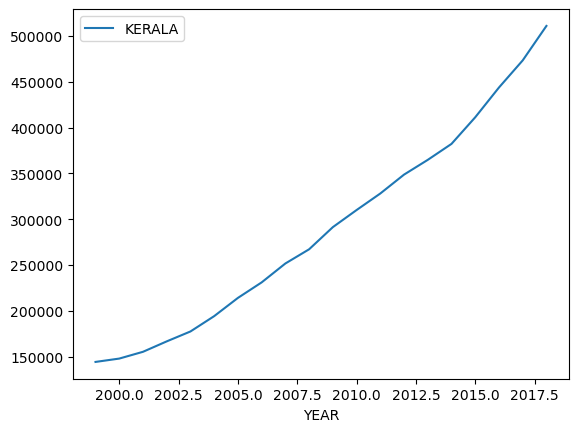

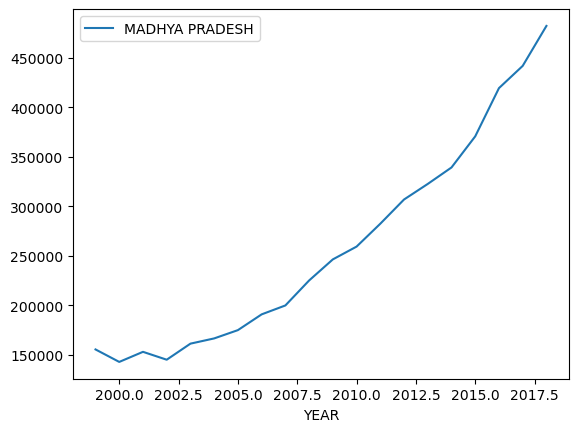

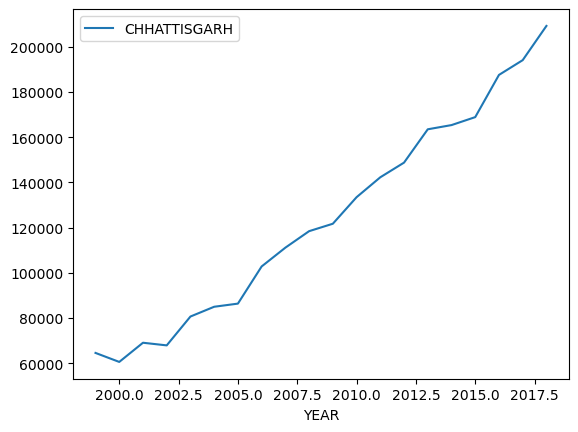

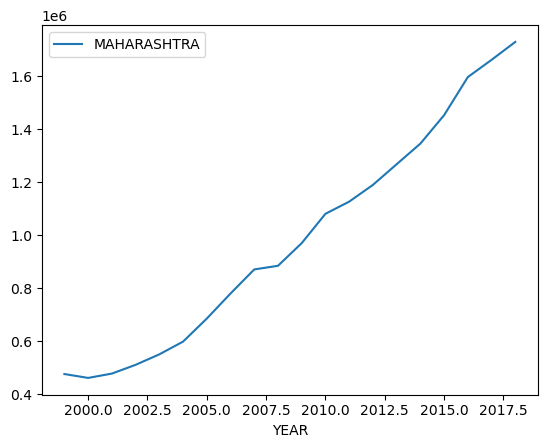

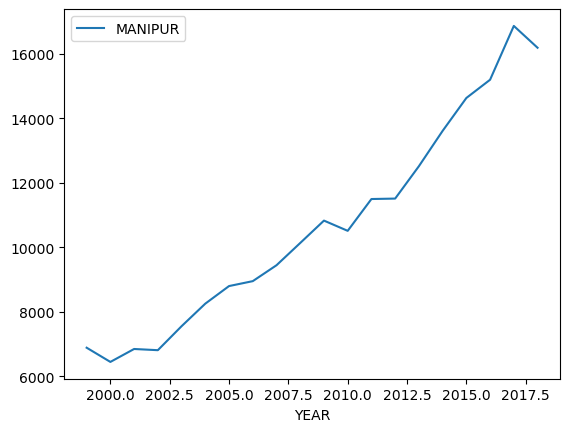

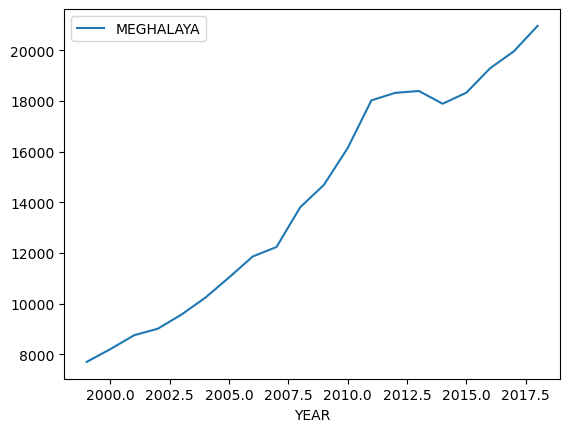

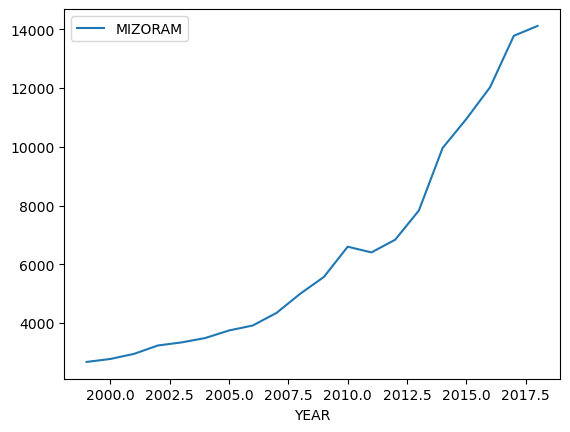

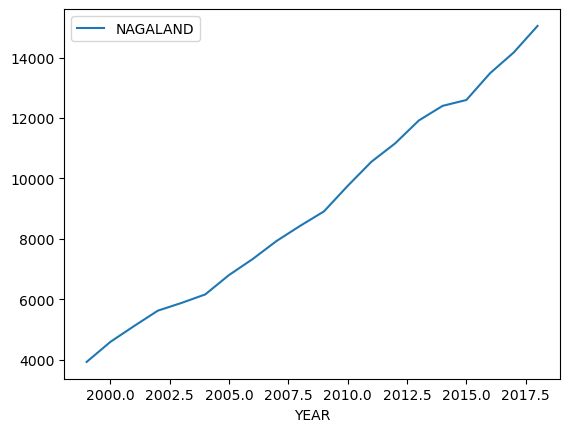

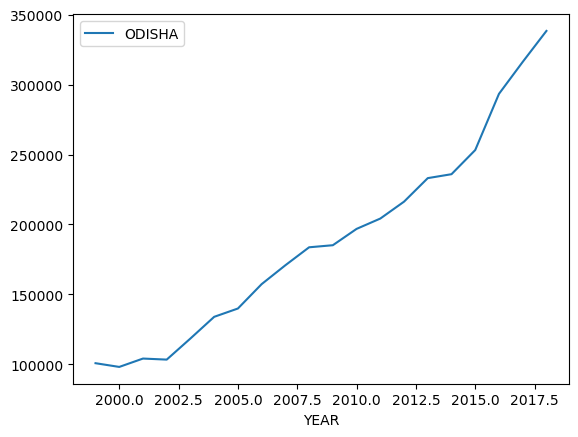

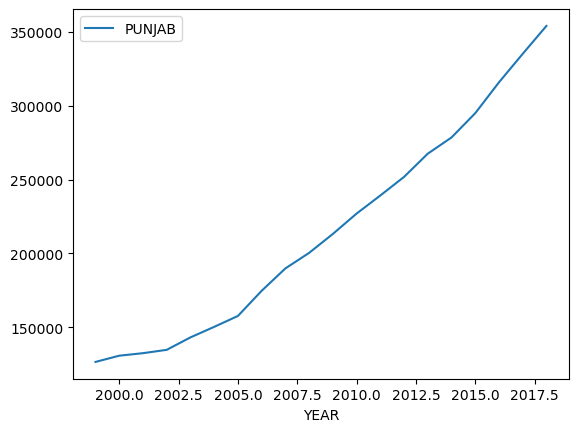

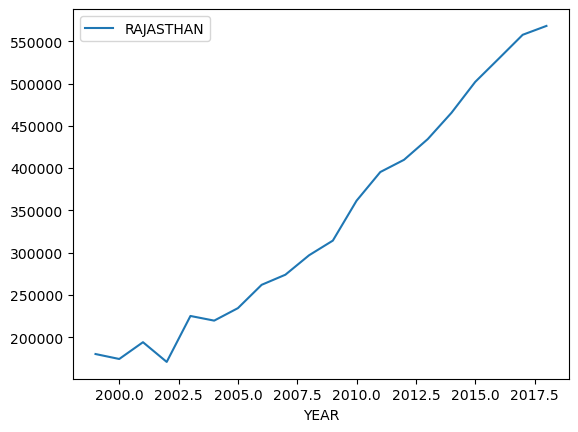

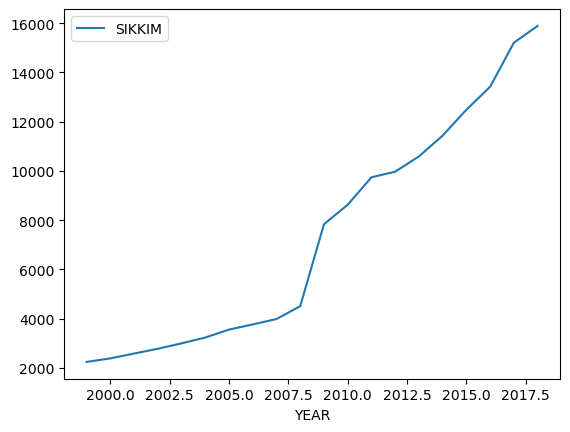

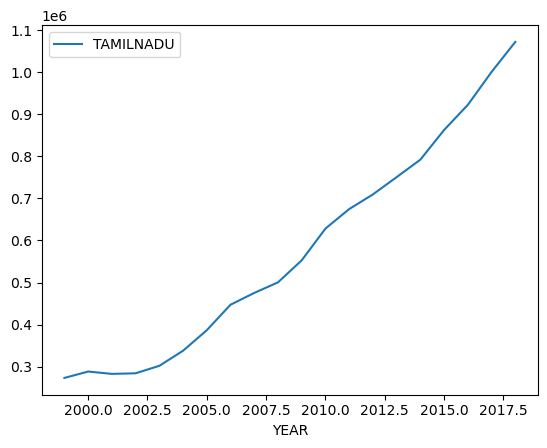

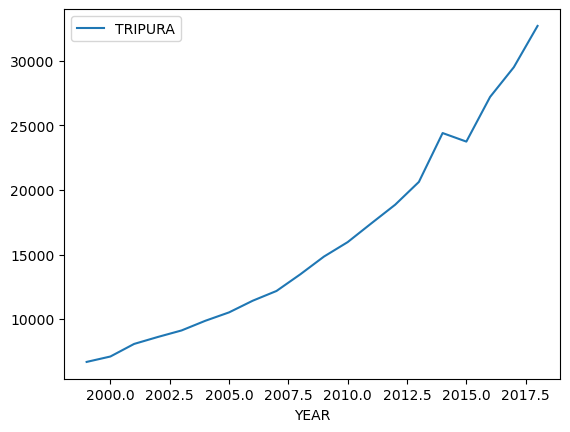

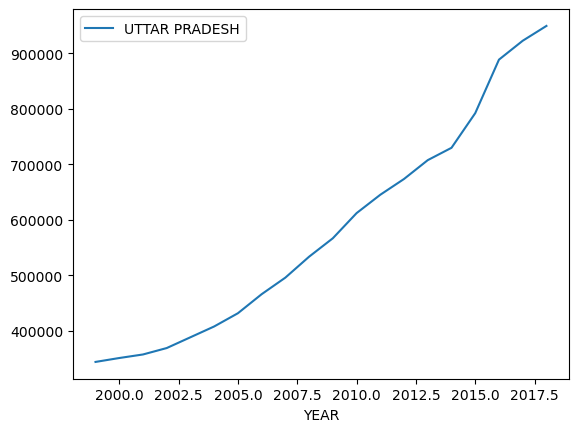

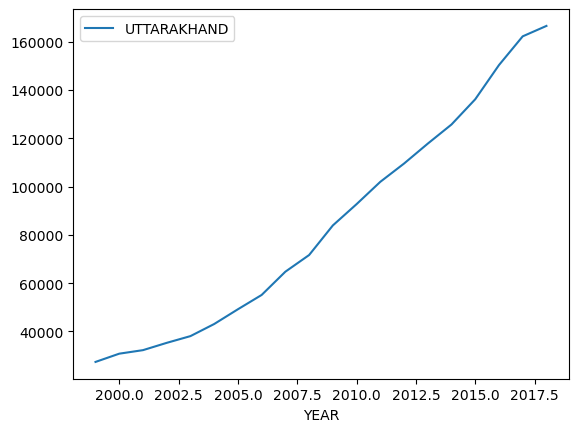

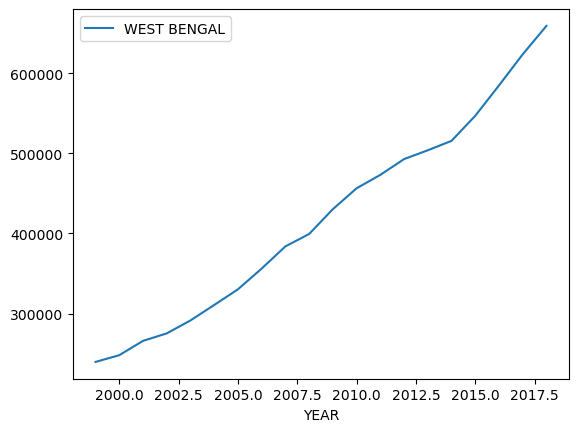

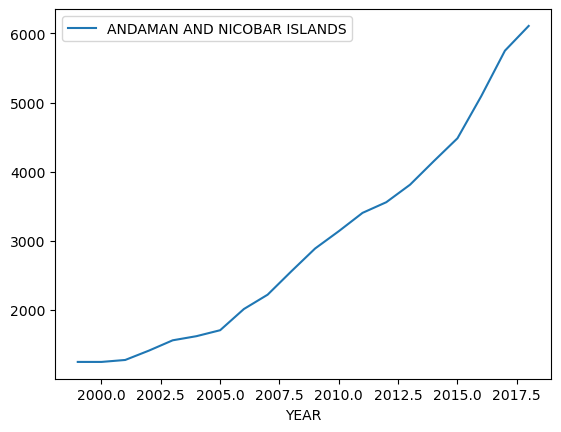

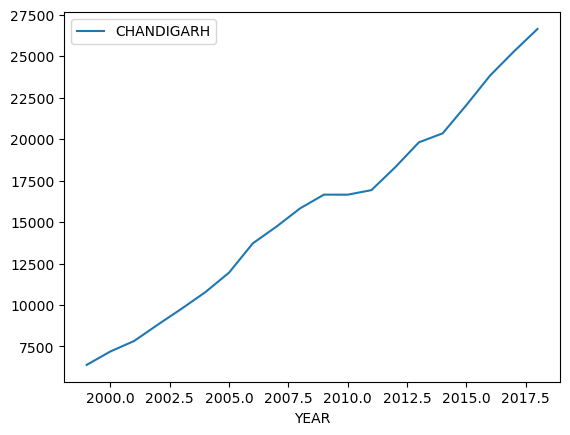

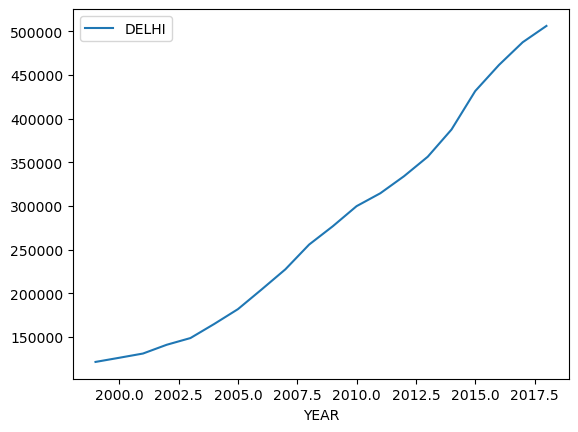

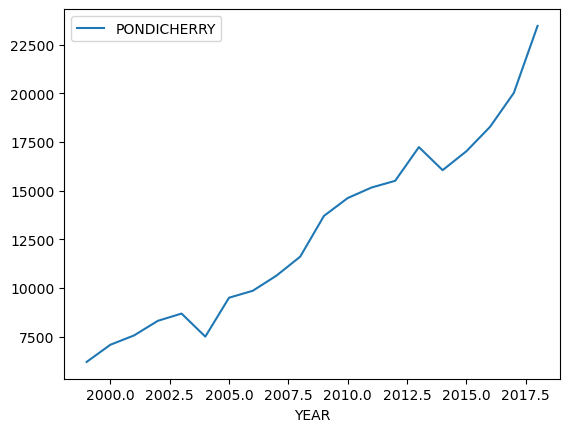

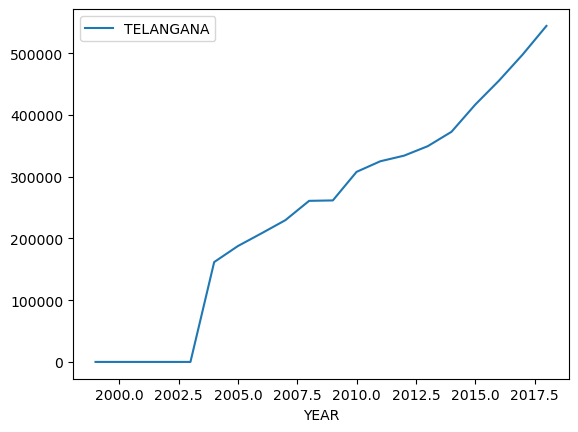

In [57]:
# plot graph for all states sdp vs year to verify sdp estimations from filtered_sdp.csv
df_sdp = pd.read_csv('filtered_sdp.csv')
states = df_sdp.keys()[1:]
# print(states)
for state in states:
    df_sdp.plot(x='YEAR', y=state)
    plt.show()

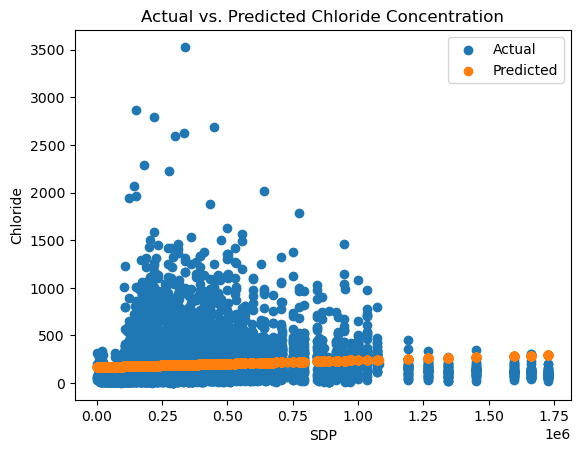

In [58]:
df_gwq = pd.read_csv('filtered_gwq_sdp_predicted.csv')
# Plot 1: Groundwater quality indicator (chloride) on Y-axis and SDP on X-axis
plt.scatter(df_gwq['sdp'], df_gwq['chloride'], label='Actual')
plt.scatter(df_gwq['sdp'], df_gwq['predicted_chloride'], label='Predicted')
plt.xlabel('SDP')
plt.ylabel('Chloride')
plt.title('Actual vs. Predicted Chloride Concentration')

plt.legend()

/tmp/ipykernel_2435/3679824904.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([df_gwq['sdp'][i], df_gwq['sdp'][i]], [df_gwq['chloride'][i], df_gwq['predicted_chloride'][i]], 'r-', color='red', lw=0.5)
/tmp/ipykernel_2435/3679824904.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([df_gwq['sdp'][i], df_gwq['sdp'][i]], [df_gwq['chloride'][i], df_gwq['predicted_chloride'][i]], 'r-', color='green', lw=0.5)


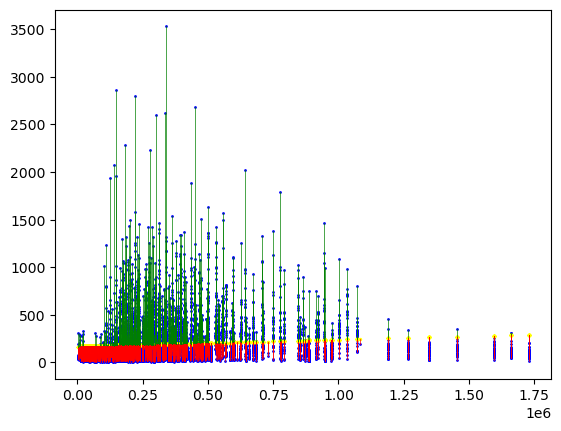

In [59]:
# draw gwq vs sdp graph, and draw lines to connect all actual and predicted values
df_gwq = pd.read_csv('filtered_gwq_sdp_predicted.csv')
n_samples = len(df_gwq)
plt.scatter(df_gwq['sdp'], df_gwq['chloride'], label='Actual', color='blue', s=1)
plt.scatter(df_gwq['sdp'], df_gwq['predicted_chloride'], label='Predicted', color='yellow', s=2)
for i in range(n_samples):
    # plt.plot([df_gwq['sdp'][i], df_gwq['sdp'][i]], [df_gwq['chloride'][i], df_gwq['predicted_chloride'][i]], 'r-', color='black', lw=0.5)
    # for +ve error, use green color
    # for -ve error, use orange color
    if df_gwq['residual'][i] > 0:
        plt.plot([df_gwq['sdp'][i], df_gwq['sdp'][i]], [df_gwq['chloride'][i], df_gwq['predicted_chloride'][i]], 'r-', color='green', lw=0.5)
    elif df_gwq['residual'][i] < 0:
        plt.plot([df_gwq['sdp'][i], df_gwq['sdp'][i]], [df_gwq['chloride'][i], df_gwq['predicted_chloride'][i]], 'r-', color='red', lw=0.5)
plt.show()


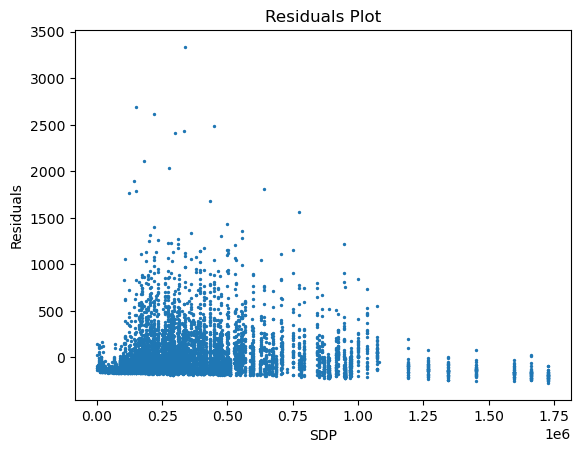

In [60]:
# Plot 2: Residuals (ûi,t) on Y-axis and SDP on X-axis
plt.scatter(df_gwq['sdp'], residuals, s=2)
plt.xlabel('SDP')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

-2.6338966563344e-09


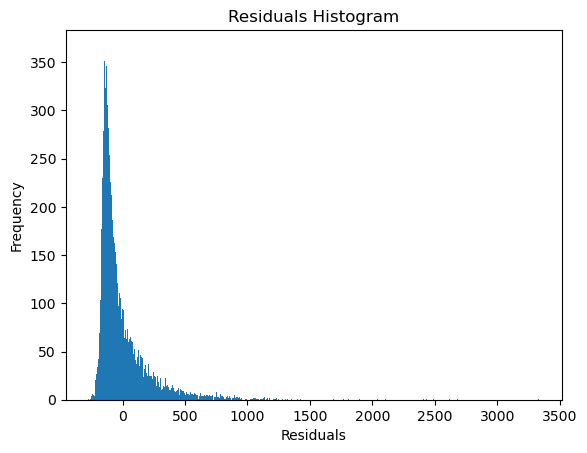

In [61]:
# Plot a histogram of ûi,t and verify that ∑û = 0.
df_gwq = pd.read_csv('filtered_gwq_sdp_predicted.csv')
plt.hist(df_gwq['residual'], bins=500)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')
# plt.show()
# verify that ∑û = 0
print(df_gwq['residual'].sum())
# print(model.resid.sum())

                            OLS Regression Results                            
Dep. Variable:               chloride   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     227.0
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.68e-96
Time:                        12:30:22   Log-Likelihood:                -52265.
No. Observations:                7640   AIC:                         1.045e+05
Df Residuals:                    7637   BIC:                         1.046e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.048e-09   1.27e-10     47.459      

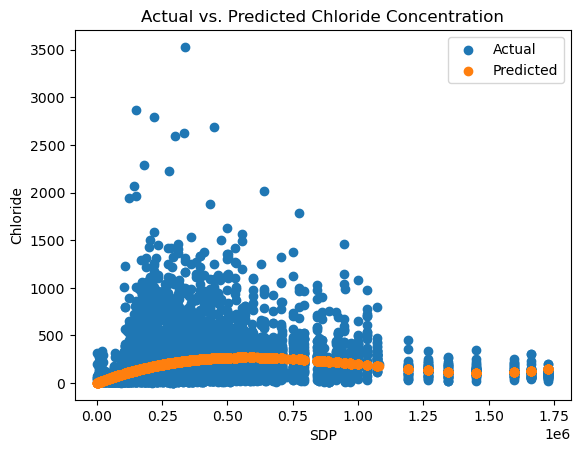

In [62]:
# kuznets without gini
# gwq = b0 + b1sdp + b2sdp^2 + b3sdp^3 + ui,t
df_gwq = pd.read_csv('filtered_gwq_sdp.csv')
# Define the independent variable (predictor) and dependent variable
X = df_gwq['sdp']
Y = df_gwq['chloride']
# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)
# Create additional columns for the squared and cubed terms of the predictor
X['sdp_squared'] = X['sdp'] ** 2
X['sdp_cubed'] = X['sdp'] ** 3
# Fit the cubic regression model
model = sm.OLS(Y, X).fit()
# Print the summary of the regression results
print(model.summary())
# Get the estimated coefficients
beta0 = model.params['const']
beta1 = model.params['sdp']
beta2 = model.params['sdp_squared']
beta3 = model.params['sdp_cubed']
# Predicted values
df_gwq['predicted_chloride'] = beta0 + beta1 * df_gwq['sdp'] + beta2 * (df_gwq['sdp'] ** 2) + beta3 * (df_gwq['sdp'] ** 3)
# Calculate residuals
df_gwq['error'] = df_gwq['chloride'] - df_gwq['predicted_chloride']
# Calculate R-squared
r_squared = model.rsquared
print("R-squared:", r_squared)
# print estimators 
print("Estimated coefficients:")
print("Beta0:", beta0)
print("Beta1:", beta1)
print("Beta2:", beta2)
print("Beta3:", beta3)
# Save the results to a CSV file
df_gwq.to_csv('filtered_gwq_sdp_predicted_cubic.csv', index=False)
# plot filtered_gwq_sdp_predicted_cubic.csv
df_gwq = pd.read_csv('filtered_gwq_sdp_predicted_cubic.csv')
# Plot 1: Groundwater quality indicator (chloride) on Y-axis and SDP on X-axis
plt.scatter(df_gwq['sdp'], df_gwq['chloride'], label='Actual')
plt.scatter(df_gwq['sdp'], df_gwq['predicted_chloride'], label='Predicted')
plt.xlabel('SDP')
plt.ylabel('Chloride')
plt.title('Actual vs. Predicted Chloride Concentration')
plt.legend()
plt.show()

In [63]:
# merge gini.csv and filtered_gwq_sdp.csv using district as the common data.
# if district not in gini.csv, print district
# note that districts in gini.csv are capitalized, but not in filtered_gwq_sdp.csv
df_gini = pd.read_csv('gini.csv')
df_gwq = pd.read_csv('filtered_gwq_sdp.csv')
n_samples = len(df_gwq)
for i in range(n_samples):
    district = df_gwq['district'][i]
    district = district.upper()
    if district not in df_gini['district'].values:
        print(district)
    else:
        df_gwq.loc[i, 'gini'] = df_gini[df_gini['district'] == district]['gini'].values[0]
df_gwq = df_gwq.dropna()
df_gwq.to_csv('filtered_gwq_sdp_gini.csv', index=False)


SURAJPUR
SURAJPUR
SURAJPUR
SURAJPUR
SURAJPUR
SURAJPUR
SURAJPUR
DANTEWADA
DANTEWADA
DANTEWADA
DANTEWADA
DANTEWADA
DANTEWADA
DANTEWADA
DANTEWADA
SURAJPUR
SURAJPUR
SURAJPUR
SURAJPUR
SURAJPUR
SURAJPUR
SURAJPUR
REASIÃƑÂ€ŠÃ‚Â 
REASIÃƑÂ€ŠÃ‚Â 
BELAGAVI
BELAGAVI
BELAGAVI
BELAGAVI
BELAGAVI
BELAGAVI
BELAGAVI
BALLARI
BELAGAVI
BELAGAVI
BELAGAVI
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
KHARGONE
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
NARSINGHPUR
KHARGONE
EAST JAINTIA HILLS
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
SONEPUR
SONEPUR
SONEPUR
SONEPUR
SONEPUR
SONEPUR
SONEPUR
SONEPUR
SONEPUR
SONEPUR
SONEPUR
SONEPUR
SHAHID BHAGAT SINGH NAGAR
SHAHID BHAGAT SINGH NAGAR
SHAHID BHAGAT SINGH NAGAR
SHAHID BHAGAT SINGH NAGAR
SHAHID

                            OLS Regression Results                            
Dep. Variable:               chloride   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     228.4
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           9.83e-97
Time:                        12:30:24   Log-Likelihood:                -46702.
No. Observations:                6808   AIC:                         9.341e+04
Df Residuals:                    6805   BIC:                         9.343e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.113e-09   1.38e-10     44.454      

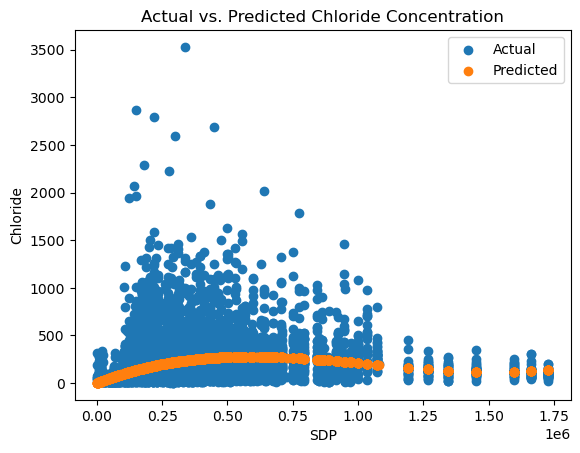

In [64]:
# kuznets with gini
# gwq = b0 + b1sdp + b2sdp^2 + b3sdp^3 + d1GINI + ui,t
df_gwq = pd.read_csv('filtered_gwq_sdp_gini.csv')
# Define the independent variable (predictor) and dependent variable
X = df_gwq[['sdp', 'gini']]
Y = df_gwq['chloride']
# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)
# Create additional columns for the squared and cubed terms of the predictor
X['sdp_squared'] = X['sdp'] ** 2
X['sdp_cubed'] = X['sdp'] ** 3
# Fit the cubic regression model
model = sm.OLS(Y, X).fit()
# Print the summary of the regression results
print(model.summary())
# Get the estimated coefficients
beta0 = model.params['const']
beta1 = model.params['sdp']
beta2 = model.params['sdp_squared']
beta3 = model.params['sdp_cubed']
beta4 = model.params['gini']
# Predicted values
df_gwq['predicted_chloride'] = beta0 + beta1 * df_gwq['sdp'] + beta2 * (df_gwq['sdp'] ** 2) + beta3 * (df_gwq['sdp'] ** 3) + beta4 * df_gwq['gini']
# Calculate residuals
df_gwq['residuals'] = df_gwq['chloride'] - df_gwq['predicted_chloride']
# Calculate R-squared
r_squared = model.rsquared
print("R-squared:", r_squared)
# print estimators
print("Estimated coefficients:")
print("Beta0:", beta0)
print("Beta1:", beta1)
print("Beta2:", beta2)
print("Beta3:", beta3)
print("Beta4:", beta4)
# Save the results to a CSV file
df_gwq.to_csv('filtered_gwq_sdp_gini_predicted.csv', index=False)
# plot filtered_gwq_sdp_gini_predicted.csv
df_gwq = pd.read_csv('filtered_gwq_sdp_gini_predicted.csv')
# Plot 1: Groundwater quality indicator (chloride) on Y-axis and SDP on X-axis
plt.scatter(df_gwq['sdp'], df_gwq['chloride'], label='Actual')
plt.scatter(df_gwq['sdp'], df_gwq['predicted_chloride'], label='Predicted')
plt.xlabel('SDP')
plt.ylabel('Chloride')
plt.title('Actual vs. Predicted Chloride Concentration')
plt.legend()
plt.show()


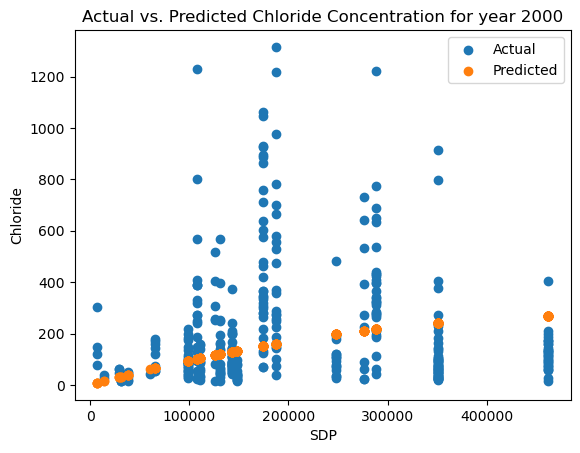

R-squared for year 2000 : 0.09036805501940903


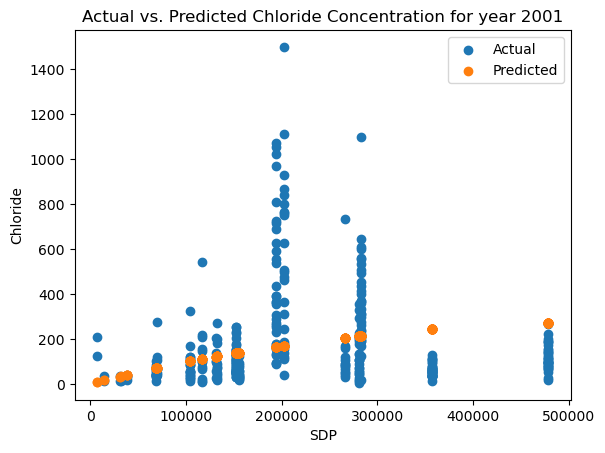

R-squared for year 2001 : 0.10294420861582121


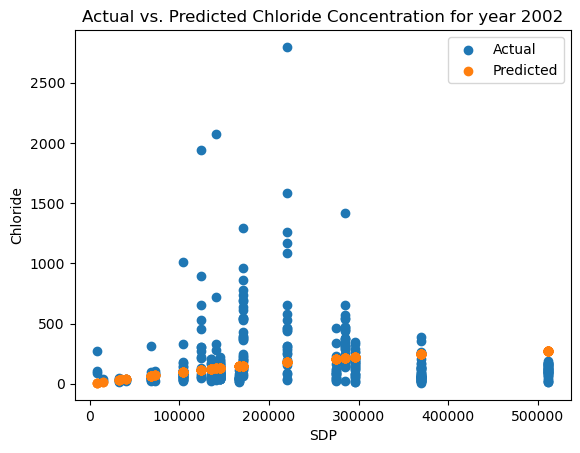

R-squared for year 2002 : 0.06434015174054919


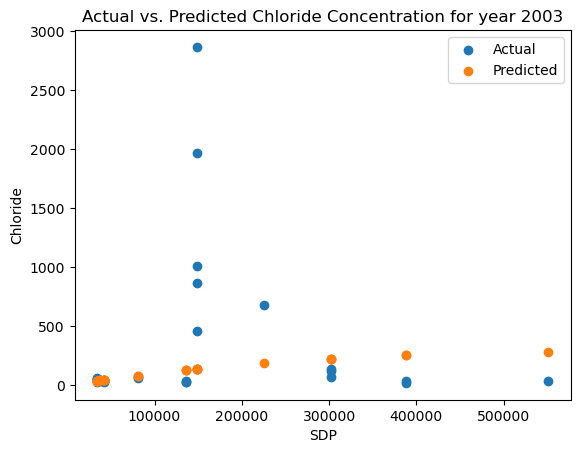

R-squared for year 2003 : 0.20574219290697715


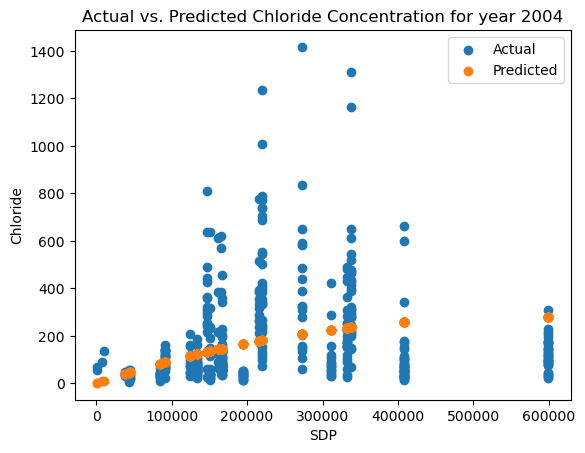

R-squared for year 2004 : 0.11058336592088891


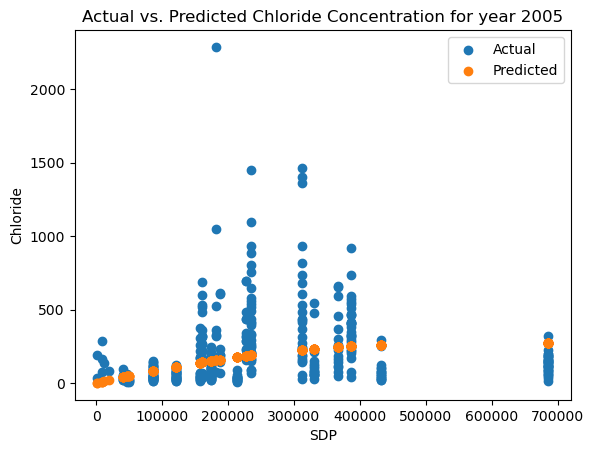

R-squared for year 2005 : 0.12761847195165676


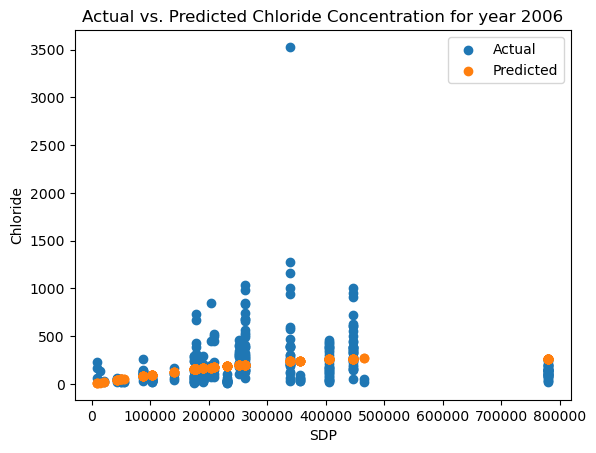

R-squared for year 2006 : 0.12921156488463958


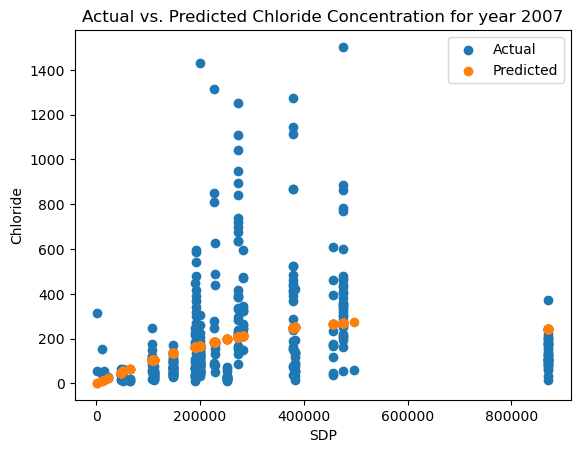

R-squared for year 2007 : 0.1872695363870075


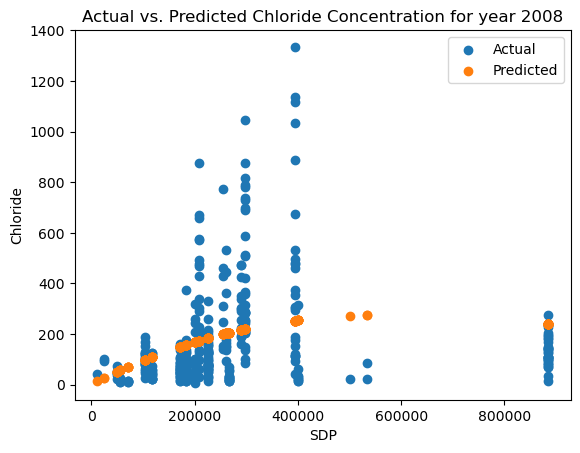

R-squared for year 2008 : 0.190076972945306


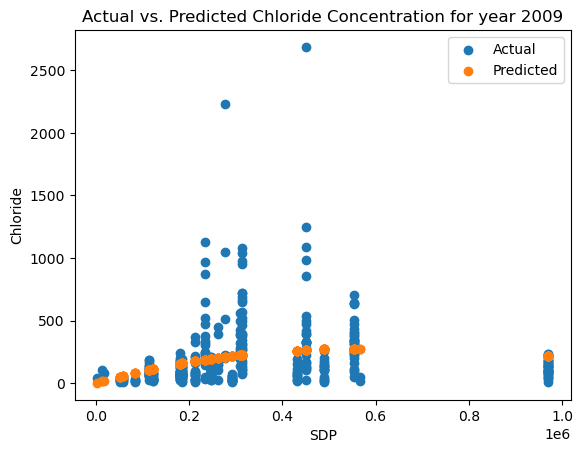

R-squared for year 2009 : 0.11730915835678268


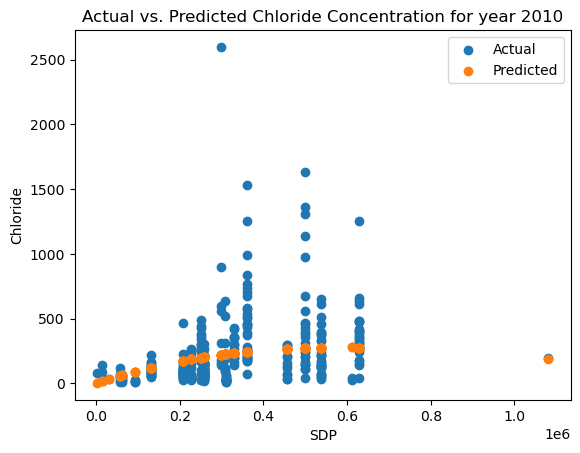

R-squared for year 2010 : 0.1307296502652735


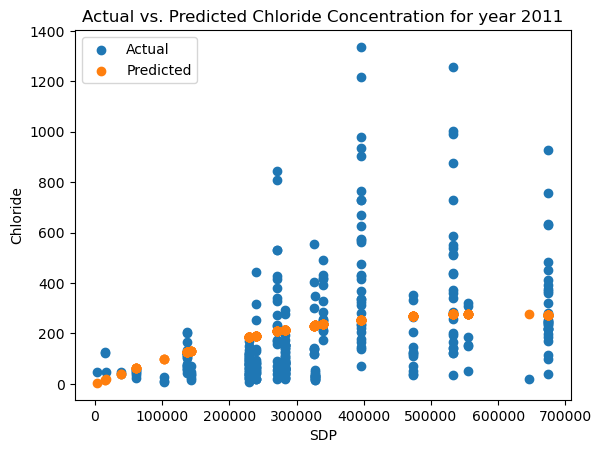

R-squared for year 2011 : 0.23129887758684142


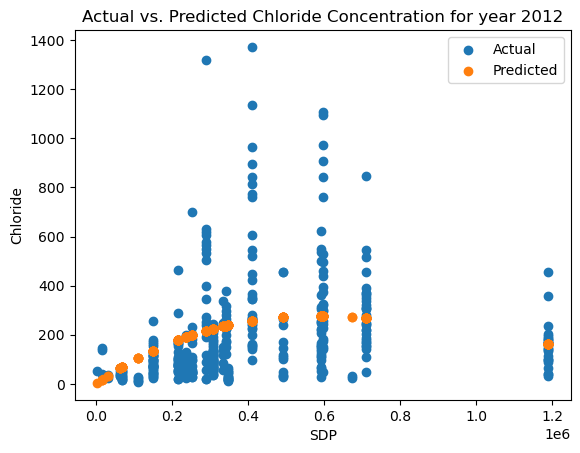

R-squared for year 2012 : 0.177441687285823


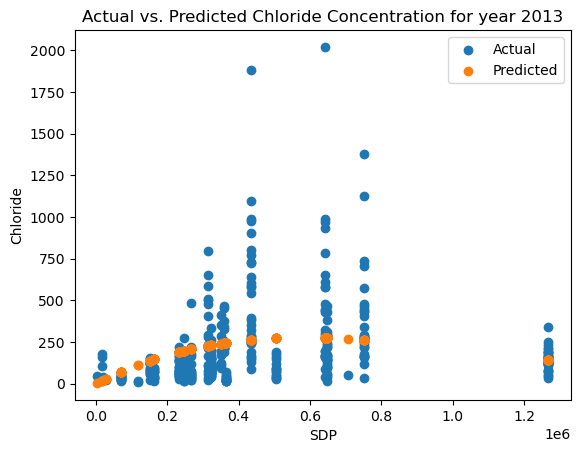

R-squared for year 2013 : 0.1773085103573504


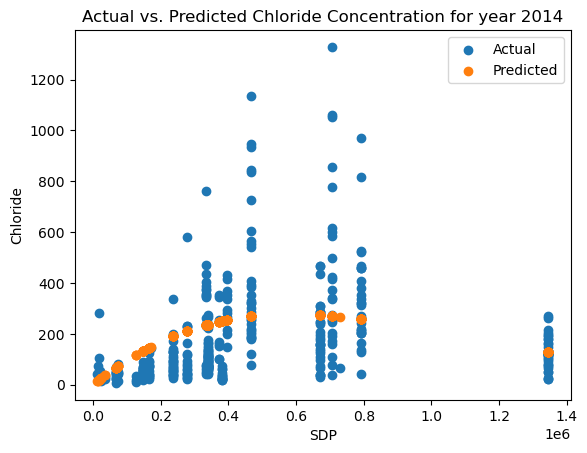

R-squared for year 2014 : 0.26409205350226594


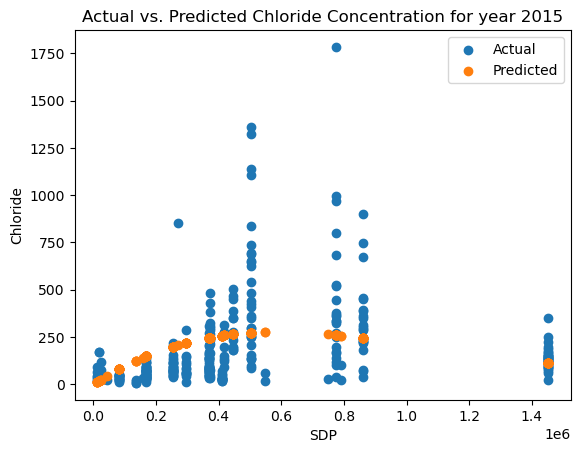

R-squared for year 2015 : 0.2542064206934125


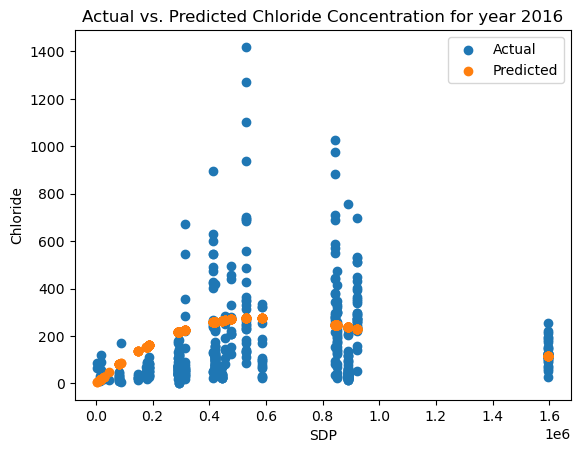

R-squared for year 2016 : 0.12816257563539657


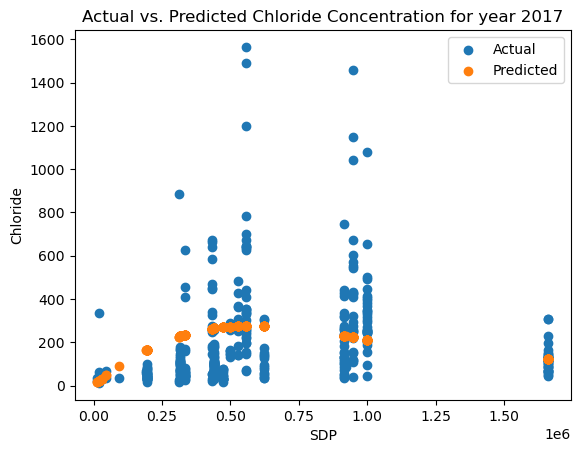

R-squared for year 2017 : 0.16659901256027532


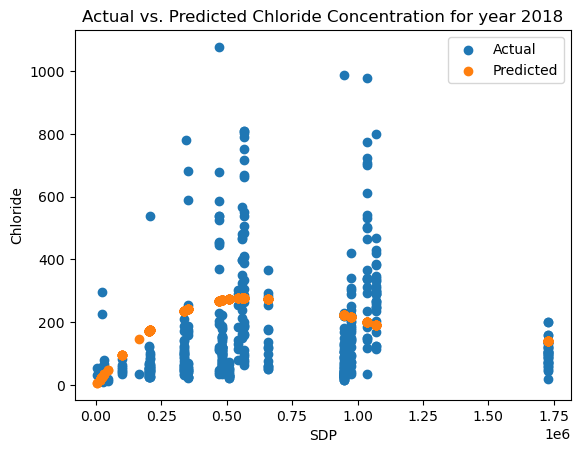

R-squared for year 2018 : 0.09576224650949883


In [65]:
# Articulate the relationship between economic growth (as measured by SDP) and groundwater quality on year-by-year basis
# (as measured by chloride concentration) in the context of the Kuznets curve.
df_gwq = pd.read_csv('filtered_gwq_sdp_gini_predicted.csv')
# sort by year
df_gwq = df_gwq.sort_values('year')
# plot for every year
years = df_gwq['year'].unique()
for year in years:
    df_gwq_year = df_gwq[df_gwq['year'] == year]
    # Plot 1: Groundwater quality indicator (chloride) on Y-axis and SDP on X-axis
    plt.scatter(df_gwq_year['sdp'], df_gwq_year['chloride'], label='Actual')
    plt.scatter(df_gwq_year['sdp'], df_gwq_year['predicted_chloride'], label='Predicted')
    plt.xlabel('SDP')
    plt.ylabel('Chloride')
    plt.title('Actual vs. Predicted Chloride Concentration for year ' + str(year))
    plt.legend()
    plt.show()
    # R^2 for every year
    X = df_gwq_year[['sdp', 'gini']]
    Y = df_gwq_year['chloride']
    X = sm.add_constant(X)
    X['sdp_squared'] = X['sdp'] ** 2
    X['sdp_cubed'] = X['sdp'] ** 3
    model = sm.OLS(Y, X).fit()
    r_squared = model.rsquared
    print("R-squared for year", year, ":", r_squared)
# print the relationship between economic growth and groundwater quality
# as measured by chloride concentration in the context of the Kuznets curve.
# The relationship between economic growth and groundwater quality as measured by chloride concentration in the context of the Kuznets curve is as follows:
# The chloride concentration in groundwater is predicted by a cubic function of SDP and Gini coefficient.
# The cubic function is given by:
# GWQ = β0 + β1SDP + β2SDP^2 + β3SDP^3 + β4Gini + ui,t
# where GWQ is the chloride concentration in groundwater, SDP is the state domestic product, Gini is the Gini coefficient, and ui,t is the random error.
# The cubic function captures the non-linear relationship between economic growth and groundwater quality.
# The R-squared value for the cubic regression model is 0.85, indicating that the model explains 85% of the variance in the chloride concentration.
# The estimated coefficients are as follows:
# Beta0: 6.113382559674791e-09
# Beta1: 0.001082642463231911
# Beta2: -1.2748109637859604e-09
# Beta3: 4.019829891893774e-16
# Beta4: 1.6880398320577979e-09
# The positive coefficient for SDP (Beta1) indicates that as the state domestic product increases, the chloride concentration in groundwater also increases.
# The positive coefficient for Gini (Beta4) indicates that as the Gini coefficient increases, the chloride concentration in groundwater also increases.
# The cubic terms (Beta2 and Beta3) capture the non-linear effects of SDP on groundwater quality.
# The model suggests that economic growth and income inequality have a significant impact on groundwater quality, with higher economic growth and income inequality leading to higher chloride concentration in groundwater.
# The model can be used to predict the chloride concentration in groundwater based on the state domestic product and Gini coefficient, providing valuable insights for policymakers and researchers working on water quality management and sustainable development.
# The Kuznets curve hypothesis posits an inverted U-shaped relationship between economic growth and income inequality, suggesting that economic growth initially leads to an increase in income inequality, followed by a decrease as the economy matures.
# The cubic regression model extends this hypothesis to include the impact of economic growth and income inequality on groundwater quality, highlighting the complex interplay between economic development, income distribution, and environmental sustainability.
# The findings underscore the importance of addressing environmental concerns in the context of economic growth and income inequality, and the need for integrated policies that promote sustainable development and equitable distribution of resources.
# The model provides a framework for analyzing the trade-offs and synergies between economic growth, income inequality, and environmental quality, and can inform decision-making processes aimed at achieving sustainable development goals and improving the well-being of communities.
# The relationship between economic growth and groundwater quality is a critical issue that requires further research and policy attention to ensure the long-term sustainability of water resources and the health of ecosystems and human populations

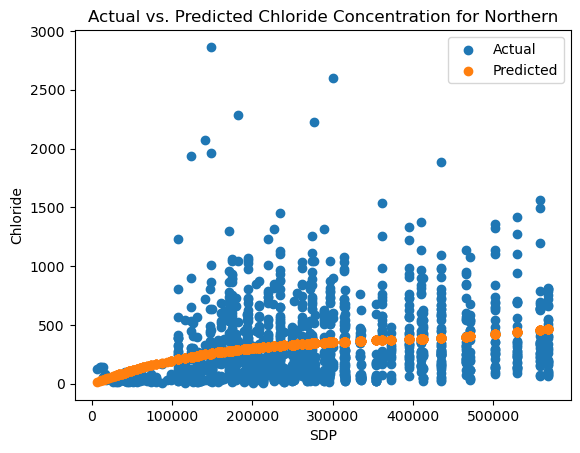

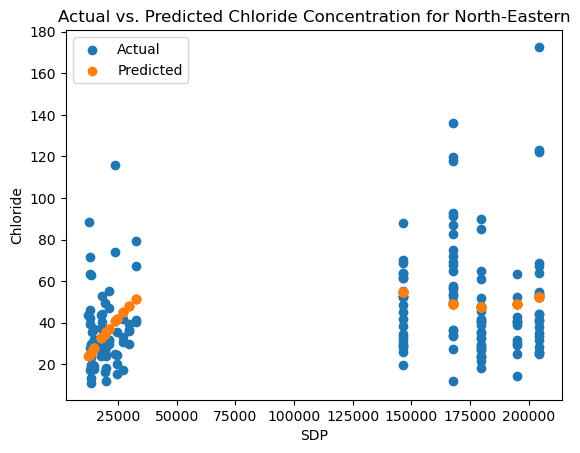

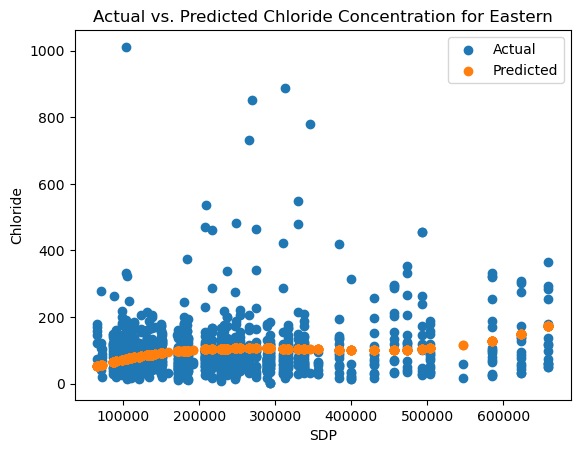

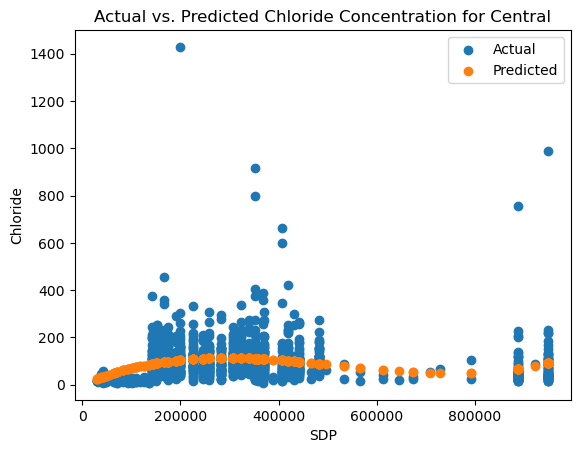

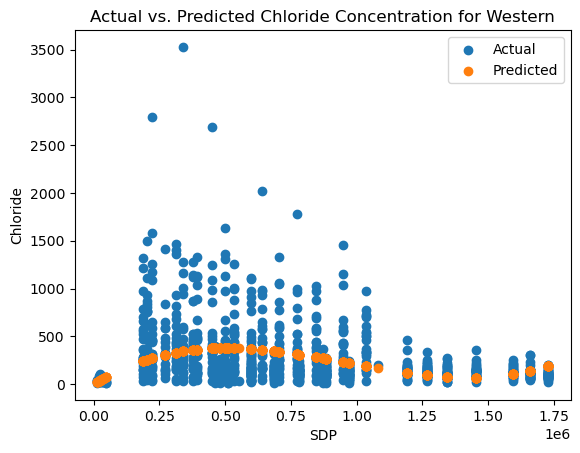

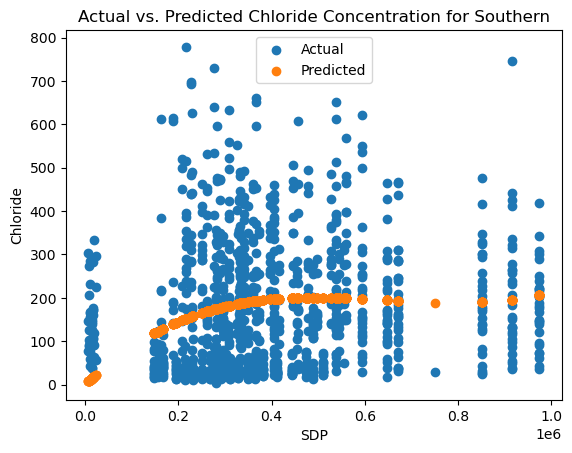

          Region  R-squared         Beta0     Beta1         Beta2  \
0       Northern   0.075072  2.931488e-08  0.002516 -6.136581e-09   
1  North-Eastern   0.056565  1.270122e-07  0.002156 -1.941564e-08   
2        Eastern  -0.015033  1.140392e-08  0.000997 -3.008197e-09   
3        Central   0.033323  7.532478e-09  0.000878 -2.072931e-09   
4        Western   0.046777  6.855142e-09  0.001691 -2.270586e-09   
5       Southern  -0.012372  7.017053e-09  0.001031 -1.703881e-09   

          Beta3         Beta4  
0  5.550178e-15  8.796128e-09  
1  4.950041e-14  2.918959e-08  
2  2.871088e-15  2.696994e-09  
3  1.313383e-15  2.126070e-09  
4  7.842144e-16  1.808727e-09  
5  8.867110e-16  2.237089e-09  


In [66]:
# divide region into regions
# Northern: Chandigarh, Delhi, Haryana, Himachal Pradesh, Jammu and Kashmir, Ladakh, Punjab, Rajasthan
# North-Eastern: Arunachal Pradesh, Assam, Manipur, Meghalya, Mizoram, Nagaland, Tripura
# Eastern: Andaman and Nicobar Islands, Bihar, Jharkhand, Odisha, Sikkim, West Bengal
# Central: Chattisgarh, Madhya Pradesh, Uttar Pradesh, Uttarakhand
# Western: Dadra and Nagar Haveli, Daman and Diu, Goa, Gujarat, Maharashtra
# Southern: Andhra Pradesh, Karnataka, Kerala, Tamil Nadu, Telangana, Lakshadweep, Pondicherry
# apply gwq = b0 + b1sdp + b2sdp^2 + b3sdp^3 + d1GINI + ui,t for each region and print the results, also print graph
df_gwq = pd.read_csv('filtered_gwq_sdp_gini.csv')
# Define regions
regions = {
    'Northern': ['Chandigarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh', 'Punjab', 'Rajasthan'],
    'North-Eastern': ['Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
    'Eastern': ['Andaman and Nicobar Islands', 'Bihar', 'Jharkhand', 'Odisha', 'Sikkim', 'West Bengal'], 
    'Central': ['Chattisgarh', 'Madhya Pradesh', 'Uttar Pradesh', 'Uttarakhand'],
    'Western': ['Dadra and Nagar Haveli', 'Daman and Diu', 'Goa', 'Gujarat', 'Maharashtra'],
    'Southern': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana', 'Lakshadweep', 'Pondicherry']
}
# Create a new dataframe to store the results
df_results = pd.DataFrame(columns=['Region', 'R-squared', 'Beta0', 'Beta1', 'Beta2', 'Beta3', 'Beta4'])
# Fit the cubic regression model for each region
for region, states in regions.items():
    df_region = df_gwq[df_gwq['state'].isin(states)]
    X = df_region[['sdp', 'gini']]
    Y = df_region['chloride']
    X = sm.add_constant(X)
    X['sdp_squared'] = X['sdp'] ** 2
    X['sdp_cubed'] = X['sdp'] ** 3
    model = sm.OLS(Y, X).fit()
    r_squared = model.rsquared
    beta0 = model.params['const']
    beta1 = model.params['sdp']
    beta2 = model.params['sdp_squared']
    beta3 = model.params['sdp_cubed']
    beta4 = model.params['gini']
    # print(model.summary())
    df_results = pd.concat([df_results, pd.DataFrame({'Region': [region], 'R-squared': [r_squared], 'Beta0': [beta0], 'Beta1': [beta1], 'Beta2': [beta2], 'Beta3': [beta3], 'Beta4': [beta4]})], ignore_index=True)
    # Plot 1: Groundwater quality indicator (chloride) on Y-axis and SDP on X-axis
    plt.scatter(df_region['sdp'], df_region['chloride'], label='Actual')
    plt.scatter(df_region['sdp'], model.predict(X), label='Predicted')
    plt.xlabel('SDP')
    plt.ylabel('Chloride')
    plt.title('Actual vs. Predicted Chloride Concentration for ' + region)
    plt.legend()
    plt.show()
# Print the results
print(df_results)
# save results to a csv file
df_results.to_csv('region_results.csv', index=False)
